In [23]:
!pip install keras

In [0]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

In [29]:
#Load training data
nb_classes = 10

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


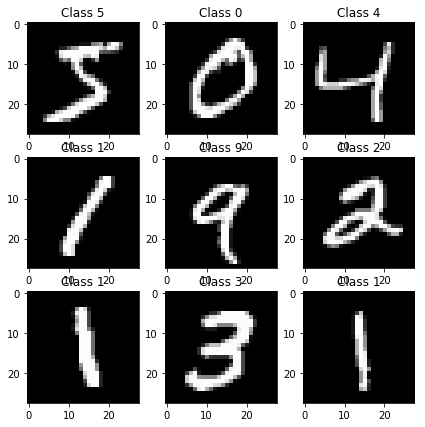

In [38]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

In [42]:
#Format the data for training
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [0]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [0]:
#Build the neural network
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
                              # of the layer above. Here, with a "rectified linear unit",
                              # we clamp all values below 0 to 0.
                           
model.add(Dropout(0.2))   # Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax')) # This special "softmax" activation among other things,
                                 # ensures the output is a valid probaility distribution, that is
                                 # that its values are all non-negative and sum to 1.

In [53]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_7 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_8 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
__________

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [56]:
model.fit(X_train, Y_train, batch_size=128, nb_epoch=4, verbose=1)

Epoch 1/4
  896/60000 [..............................] - ETA: 10s - loss: 0.0438 - acc: 0.9855

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 11s 179us/step - loss: 0.0436 - acc: 0.9859
Epoch 2/4
60000/60000 [==============================] - 11s 190us/step - loss: 0.0398 - acc: 0.9870
Epoch 3/4
60000/60000 [==============================] - 11s 183us/step - loss: 0.0332 - acc: 0.9892
Epoch 4/4
60000/60000 [==============================] - 11s 179us/step - loss: 0.0327 - acc: 0.9890


In [58]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.06189855741891079
Test accuracy: 0.9828


In [0]:
# Inspecting the output

# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(X_test)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

In [63]:
incorrect_indices

array([ 149,  151,  247,  320,  321,  340,  359,  445,  495,  551,  582,
        610,  619,  720,  944,  951, 1014, 1039, 1112, 1156, 1182, 1192,
       1226, 1232, 1242, 1247, 1260, 1299, 1319, 1378, 1393, 1395, 1494,
       1522, 1530, 1549, 1554, 1609, 1640, 1678, 1681, 1717, 1790, 1901,
       1941, 1952, 2018, 2035, 2040, 2043, 2053, 2098, 2109, 2118, 2135,
       2182, 2272, 2293, 2369, 2387, 2406, 2426, 2488, 2582, 2597, 2607,
       2648, 2654, 2720, 2863, 2877, 2896, 2915, 2939, 2953, 2979, 3073,
       3225, 3422, 3490, 3503, 3520, 3558, 3597, 3776, 3780, 3808, 3850,
       3853, 3906, 3941, 3943, 3976, 3985, 4000, 4027, 4065, 4078, 4154,
       4163, 4199, 4224, 4248, 4289, 4425, 4443, 4497, 4536, 4639, 4740,
       4751, 4761, 4807, 4814, 4823, 4860, 4874, 4876, 4879, 4890, 5331,
       5457, 5586, 5634, 5642, 5676, 5734, 5936, 5937, 5955, 5973, 5982,
       6011, 6023, 6059, 6166, 6173, 6555, 6558, 6574, 6597, 6632, 6651,
       6783, 7216, 7256, 7434, 7921, 8062, 8198, 82

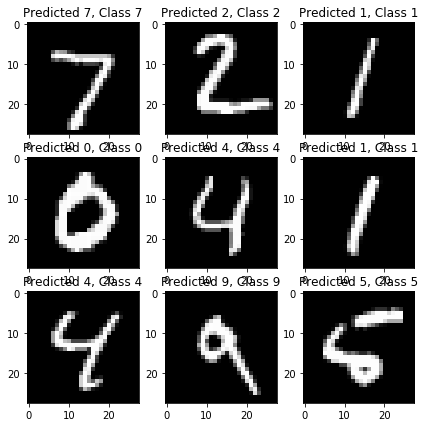

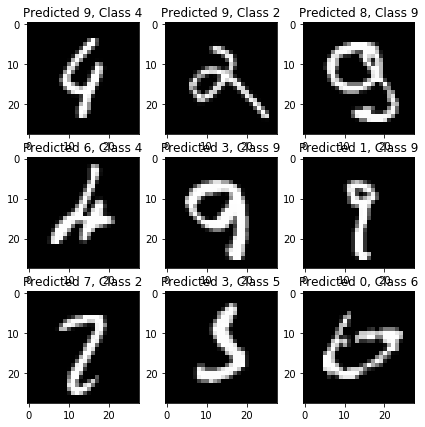

In [22]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))